In [35]:
import sys
sys.path.append('/home/hcleroy/Extra_Module_py/')
import formated_matplotlib
import pickle
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set figure size in inches
mpl.rcParams['figure.figsize'] = [5.91, 3.94]

# Set text font
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams['font.family'] = 'Ubuntu'

# Use LaTeX for text rendering
mpl.rcParams['text.usetex'] = False

# Set font size in points
mpl.rcParams['font.size'] = 28.35

# For removing minor ticks when x axis is in log scale
from matplotlib.ticker import NullLocator
import matplotlib.pyplot as plt
import matplotlib.cm as cm



In [21]:
with open("transition_N.pickle", "rb") as f:
    Linker_E_transition = pickle.load(f)
with open("transition_Ell.pickle", "rb") as f:
    Ell_E_transition = pickle.load(f)

In [30]:
del Linker_E_transition[999]

/tmp/ipykernel_81546/3059500061.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


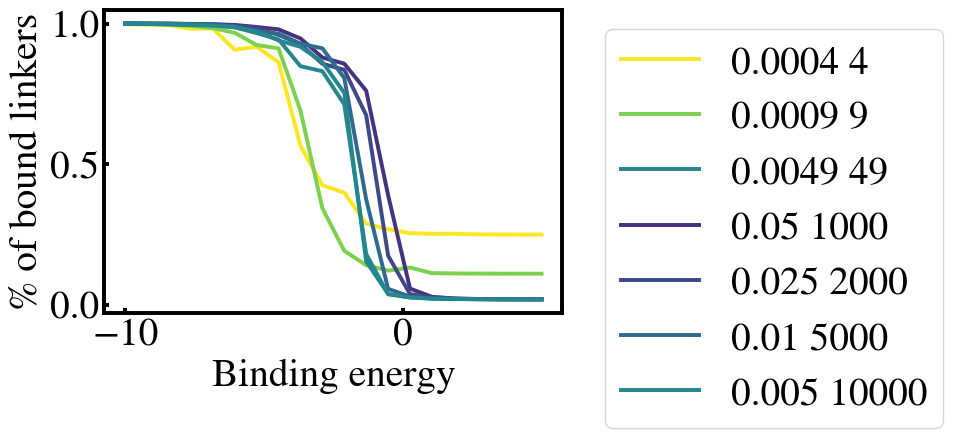

In [64]:
fig, ax = plt.subplots()
cmap = cm.get_cmap('viridis')
densities =  np.array([0.05,0.025,0.01,0.005,0.001,0.0004])
# Set the linewidth of the spines
key_to_plot = [1000,2000,5000,10**4,49,9,4]
for spine in ax.spines.values():
    spine.set_linewidth(2.83465) 
for key,value in Linker_E_transition.items():
    if key in key_to_plot:
        density = key/10**4
        ax.plot(np.asarray(value)[:,0],np.asarray(value)[:,1]/key,label=str(density) + ' '+str(key),linewidth=2.83465,color = cmap((np.log(density)/min(np.log(densities)))**2))
for key,value in Ell_E_transition.items():
    if key in key_to_plot:
        density = 50/key
        ax.plot(np.asarray(value)[:,0],np.asarray(value)[:,1]/50,label=str(density) + ' '+str(key),linewidth=2.83465,color = cmap((np.log(density)/min(np.log(densities)))**2))
ax.set_xlabel('Binding energy')
ax.set_ylabel('% of bound linkers')
ax.tick_params(width=2.83465)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('transition.svg',transparent=True,bbox_inches='tight')

In [28]:
DS = lambda N,L : np.log(L/N)

/tmp/ipykernel_81546/3862661687.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


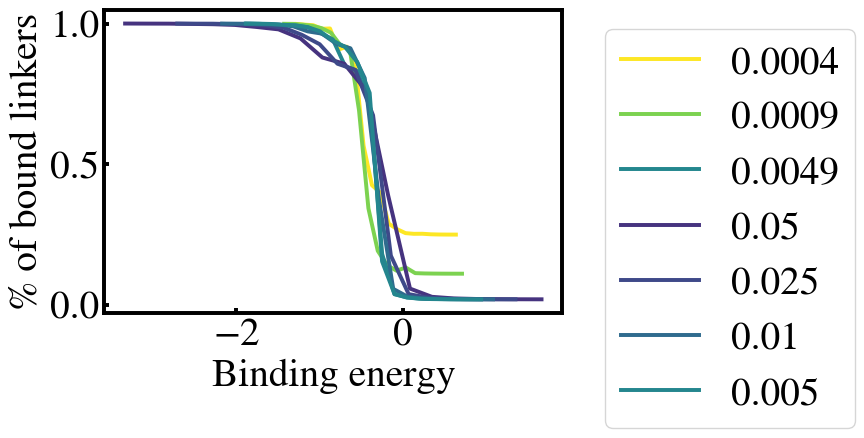

In [65]:
fig, ax = plt.subplots()
cmap = cm.get_cmap('viridis')
# Set the linewidth of the spines
key_to_plot = [1000,2000,5000,10**4,49,9,4]
for spine in ax.spines.values():
    spine.set_linewidth(2.83465) 
for key,value in Linker_E_transition.items():
    if key in key_to_plot:
        density = key/10**4
        ax.plot(np.asarray(value)[:,0]/DS(key,10**4),np.asarray(value)[:,1]/key,label=str(density),linewidth=2.83465,color = cmap((np.log(density)/min(np.log(densities)))**2))
for key,value in Ell_E_transition.items():
    if key in key_to_plot:
        density = 50/key
        ax.plot(np.asarray(value)[:,0]/DS(50,key),np.asarray(value)[:,1]/50,label=str(density),linewidth=2.83465,color = cmap((np.log(density)/min(np.log(densities)))**2))
ax.set_xlabel('Binding energy')
ax.set_ylabel('% of bound linkers')
ax.tick_params(width=2.83465)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('collapsed_transition.svg',transparent=True,bbox_inches='tight')

In [56]:
print(max(np.log(densities)))
print(np.log(densities))

-2.995732273553991
[-2.99573227 -3.68887945 -4.60517019 -5.29831737 -6.90775528 -7.82404601]


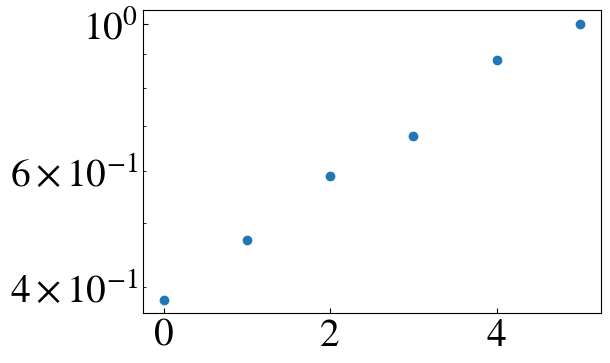

In [57]:
densities =  np.array([0.05,0.025,0.01,0.005,0.001,0.0004])
densities = densities
plt.scatter(np.arange(0,6,1),np.log(densities)/min(np.log(densities)))
plt.yscale('log')